##0.Описание задачи.
Выбранный датасет используется для предсказания будущего инсульта у человека по следующим данным о нем:


*   Идентификатор(id)
*   Пол(gender)
*   Возраст(age)
*   Наличие у человека гипертензии(hypertension) - 0 если нет, 1 если да
*   Наличие у человека сердечных заболеваний(heart_disease) - 0 если нет, 1 если да
*   Был ли человек когда-либо женат(ever_married) - "No" или "Yes"
*   Тип работы человека(work_type) - "children", "Govt_jov", "Never_worked", "Private" или "Self-employed"
*  Расположение жилища(Residence_type) - "Rural" или "Urban"
*   Уровень глюкозыв крови человека(avg_glucose_level)
*   Индекс массы тела(bmi)
*   Как часто человек курит(smoking_status) - "formerly smoked", "never smoked", "smokes" или "Unknown"

Классификация бинарная. За классы отвечает стобец stroke? 0 - у пациента не было инсульта, 1 - у пациента был инсульт.





##1.Считывание данных.

In [174]:
import sys
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [175]:
url = "https://raw.githubusercontent.com/Dmitry145/ML-Mag/main/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(url)

In [176]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##2.Визуализация данных.

Построим диаграмму, определяющую кто чаще переносил инсульт, мужчины или женщины:

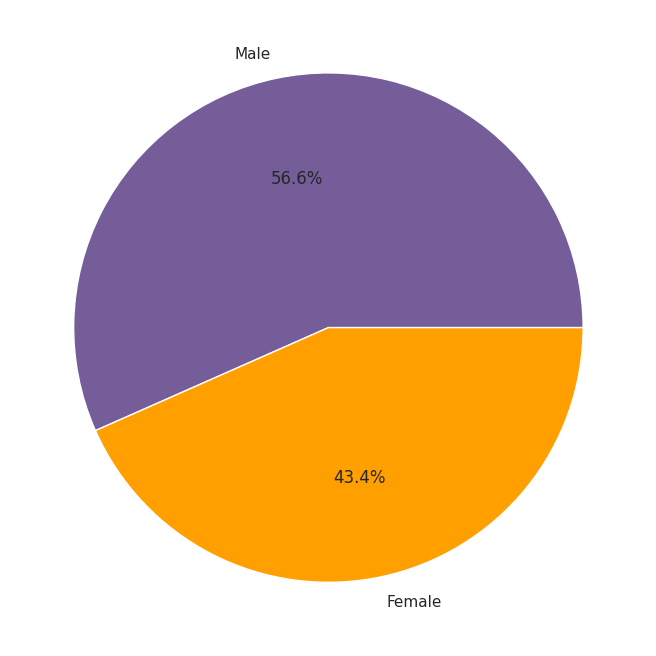

In [178]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
filtered_data = data[data['stroke'] == 1]
gender_counts = filtered_data['gender'].value_counts()
plt.pie(gender_counts, autopct='%1.1f%%', pctdistance = 0.6, labels = ['Male', 'Female'], colors = [(117/255,93/255,154/255), (255/255,160/255,0/255)])
pass

Видно, что у мужчин, согласно этим данным, инсульт случается немного чаще, чем у женщин.

Посмотрим на количество курящих:

<Axes: xlabel='smoking_status', ylabel='count'>

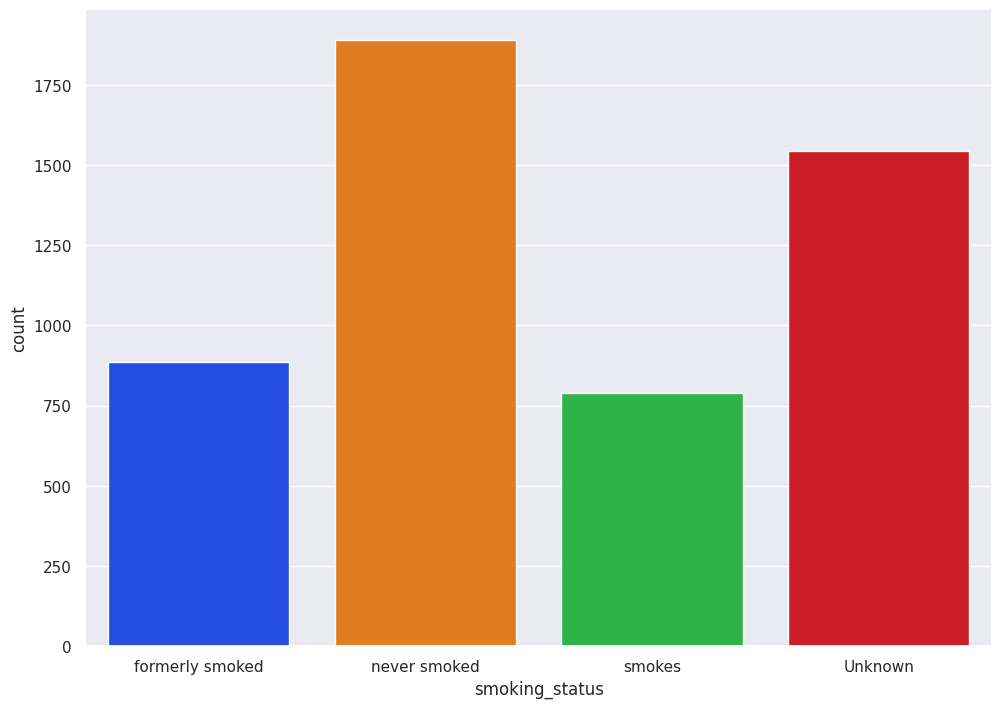

In [179]:
sns.countplot(data = data, x='smoking_status', palette='bright')

У достаточно большого количества людей в столбце, отвечающем за то, курят ли они стоит "Unknown".

Построим box plot для возраста пациентов, чтобы увидеть выбросы(важность возраста очевидна интуитивно, т.к. в зависимости от возраста у человека меняется рост и вес и, как следствие, индекс массы тела, появляется гипертензия, сердечные заболевания и растет сахар в крови):

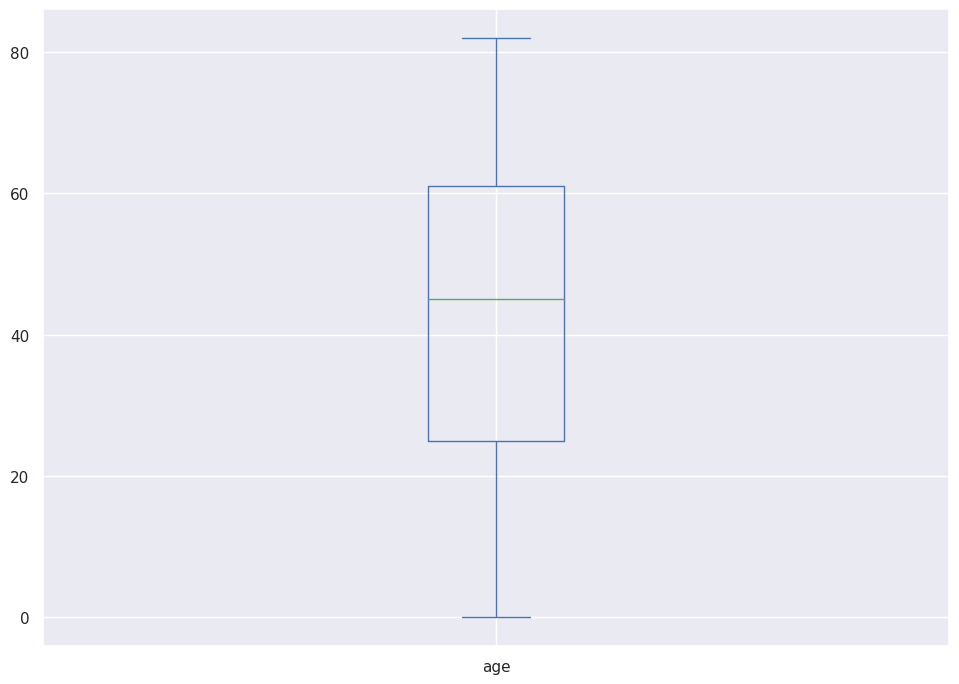

In [180]:
data['age'].plot(kind='box')
pass

Значений, выходящих за пределы "усов", которые можно было бы считать выбросами нет, да и цифры возраста от 0 до 80 с небольши кажутся реалистичными.

Матрицу корреляции построим после дальнейшенй обработки категориальных признаков.

##3.Обработка пропущенных значений.

Перед прочими махинациями удалим таки столбец id.

In [181]:
data.pop('id')

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Найдем количество пропущенных значений и столбцы, где они находятся.

In [183]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

В столбце, соответствующем индексу массы тела, имеются пропущенные значения. Заполним их медианой.

In [184]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median(axis = 0), axis=0)

In [185]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [186]:
data['gender']. value_counts ()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

В столбце "gender" присутствует 1 "other", я все-таки сочту это пропущенным значением и просто удалю, потому что одна строка не имеет большого влияния на результат:

In [187]:
data = data[data.gender != 'Other' ]

##4.Обработка категориальных признаков.

Определим количество уникальных значений в разных столбцах:

In [188]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender', 'ever_married', 'Residence_type'] ['work_type', 'smoking_status']


Те признаки, где по 2 уникальных значения превратим в бинарные:

In [189]:
data.loc[data['gender'] == 'Male', 'gender'] = 0
data.loc[data['gender'] == 'Female', 'gender'] = 1
data['gender'].describe()

count     5109
unique       2
top          1
freq      2994
Name: gender, dtype: int64

In [190]:
data.loc[data['ever_married'] == 'No', 'ever_married'] = 0
data.loc[data['ever_married'] == 'Yes', 'ever_married'] = 1
data['ever_married'].describe()

count     5109
unique       2
top          1
freq      3353
Name: ever_married, dtype: int64

In [191]:
data.loc[data['Residence_type'] == 'Urban', 'Residence_type'] = 0
data.loc[data['Residence_type'] == 'Rural', 'Residence_type'] = 1
data['Residence_type'].describe()

count     5109
unique       2
top          0
freq      2596
Name: Residence_type, dtype: int64

In [192]:
data['smoking_status']. value_counts ()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Сделаем label encoding для прочих признаков:

In [193]:
data['smoking_status_encoded'] = data['smoking_status'].factorize()[0]
data = data.drop('smoking_status', axis=1)

<ipython-input-193-7397cfdde978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_status_encoded'] = data['smoking_status'].factorize()[0]


In [194]:
data['work_type_encoded'] = data['work_type'].factorize()[0]
data = data.drop('work_type', axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_encoded,work_type_encoded
0,0,67.0,0,1,1,0,228.69,36.6,1,0,0
1,1,61.0,0,0,1,1,202.21,28.1,1,1,1
2,0,80.0,0,1,1,1,105.92,32.5,1,1,0
3,1,49.0,0,0,1,0,171.23,34.4,1,2,0
4,1,79.0,1,0,1,1,174.12,24.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,83.75,28.1,0,1,0
5106,1,81.0,0,0,1,0,125.20,40.0,0,1,1
5107,1,35.0,0,0,1,1,82.99,30.6,0,1,1
5108,0,51.0,0,0,1,1,166.29,25.6,0,0,0


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  5109 non-null   object 
 1   age                     5109 non-null   float64
 2   hypertension            5109 non-null   int64  
 3   heart_disease           5109 non-null   int64  
 4   ever_married            5109 non-null   object 
 5   Residence_type          5109 non-null   object 
 6   avg_glucose_level       5109 non-null   float64
 7   bmi                     5109 non-null   float64
 8   stroke                  5109 non-null   int64  
 9   smoking_status_encoded  5109 non-null   int64  
 10  work_type_encoded       5109 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 479.0+ KB


Некоторые столбцы всё ещё имеют тип object, исправим это:

In [196]:
data['gender'] = pd.to_numeric(data['gender'])
data['ever_married'] = pd.to_numeric(data['ever_married'])
data['Residence_type'] = pd.to_numeric(data['Residence_type'])

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  5109 non-null   int64  
 1   age                     5109 non-null   float64
 2   hypertension            5109 non-null   int64  
 3   heart_disease           5109 non-null   int64  
 4   ever_married            5109 non-null   int64  
 5   Residence_type          5109 non-null   int64  
 6   avg_glucose_level       5109 non-null   float64
 7   bmi                     5109 non-null   float64
 8   stroke                  5109 non-null   int64  
 9   smoking_status_encoded  5109 non-null   int64  
 10  work_type_encoded       5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB


После всех этих манипуляций все признаки преобразованы в числовые и можем построить корреляционную матрицу:


<Axes: >

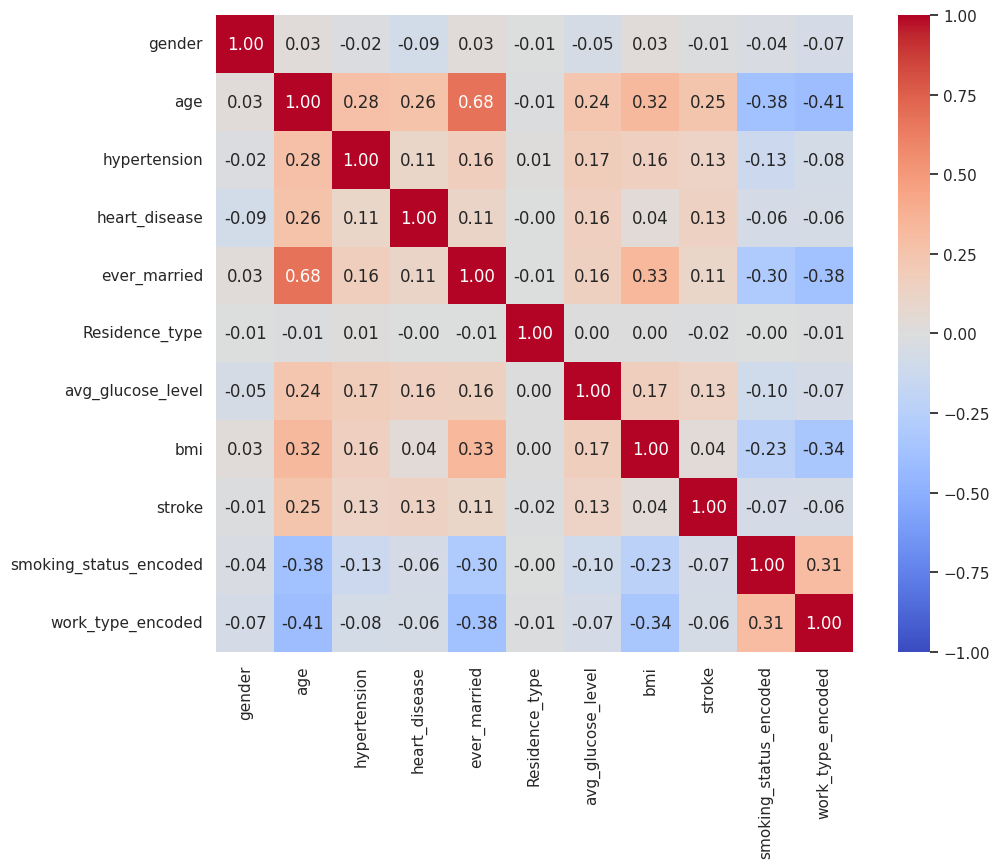

In [198]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', annot=True)

Клетки корреляционной матрицы характеризуют степень линейной зависимости 2 переменных. Здесь видно, что многие признаки(кроме статуса курильщика, пола, места проживания и типа работы), зависят от возраста, хоть и не очень сильно. Случаи инсульта не особо сильно коррелируют с прочими переменными, что, возможно, намекает на то, что линейные модели будут в данном случае не так эффективны как ансамбль деревьев решений или нейросети.

##5.Нормализация.

In [199]:
data_crop = data.drop('stroke', axis = 1)
data_class = data['stroke']

In [200]:
data_crop = (data_crop - data_crop.mean(axis = 0))/data_crop.std(axis = 0)
data_crop

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_encoded,work_type_encoded
0,-1.189675,1.051139,-0.328605,4.184190,0.723607,-0.983788,2.706185,1.004794,-1.451687,-0.749168
1,0.840401,0.785812,-0.328605,-0.238948,0.723607,1.016281,2.121444,-0.099133,-0.536275,0.144690
2,-1.189675,1.626015,-0.328605,4.184190,0.723607,1.016281,-0.004867,0.472312,-0.536275,-0.749168
3,0.840401,0.255157,-0.328605,-0.238948,0.723607,-0.983788,1.437332,0.719072,0.379137,-0.749168
4,0.840401,1.581794,3.042569,-0.238948,0.723607,1.016281,1.501150,-0.631615,-0.536275,0.144690
...,...,...,...,...,...,...,...,...,...,...
5105,0.840401,1.626015,3.042569,-0.238948,0.723607,-0.983788,-0.494433,-0.099133,-0.536275,-0.749168
5106,0.840401,1.670236,-0.328605,-0.238948,0.723607,-0.983788,0.420881,1.446365,-0.536275,0.144690
5107,0.840401,-0.363940,-0.328605,-0.238948,0.723607,1.016281,-0.511216,0.225552,-0.536275,0.144690
5108,-1.189675,0.343600,-0.328605,-0.238948,0.723607,1.016281,1.328245,-0.423817,-1.451687,-0.749168


In [201]:
data = pd.concat((data_crop, data_class), axis = 1)
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_encoded,work_type_encoded,stroke
0,-1.189675,1.051139,-0.328605,4.184190,0.723607,-0.983788,2.706185,1.004794,-1.451687,-0.749168,1
1,0.840401,0.785812,-0.328605,-0.238948,0.723607,1.016281,2.121444,-0.099133,-0.536275,0.144690,1
2,-1.189675,1.626015,-0.328605,4.184190,0.723607,1.016281,-0.004867,0.472312,-0.536275,-0.749168,1
3,0.840401,0.255157,-0.328605,-0.238948,0.723607,-0.983788,1.437332,0.719072,0.379137,-0.749168,1
4,0.840401,1.581794,3.042569,-0.238948,0.723607,1.016281,1.501150,-0.631615,-0.536275,0.144690,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.840401,1.626015,3.042569,-0.238948,0.723607,-0.983788,-0.494433,-0.099133,-0.536275,-0.749168,0
5106,0.840401,1.670236,-0.328605,-0.238948,0.723607,-0.983788,0.420881,1.446365,-0.536275,0.144690,0
5107,0.840401,-0.363940,-0.328605,-0.238948,0.723607,1.016281,-0.511216,0.225552,-0.536275,0.144690,0
5108,-1.189675,0.343600,-0.328605,-0.238948,0.723607,1.016281,1.328245,-0.423817,-1.451687,-0.749168,0


##6.Разбиение данных на тестовую и обучающую выборку.

Отведем под train 75%, а под test 25%.

In [202]:
X = data.drop('stroke', axis = 1)
y = data['stroke']
feature_names = X.columns

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(3831, 1278)

##7.Использование KNN.

Прежде всего применим KNN, т.к. этот метод устойчив к выбросам и достаточно точен, поэтому его можно использовать как хороший baseline во многих задачах, в том числе в нашей.

Для начала запустим классификатор для 3 соседей.

In [204]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [205]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [206]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [207]:
print(err_train)
print(err_test)

0.039415296267293135
0.06964006259780908


Видим ошибку в 3.9% на train и 6.9% на test.


Теперь попробуем подобрать лучшее количество соседей и выведем ошибку для этого значения гиперпараметра:

In [208]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 12, 15, 20, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04411376740644035 12


Лучшее количество соседей равно 12, выведем ошибки на train и на test:

In [209]:
knn2 = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train2 = np.mean(y_train != knn2.predict(X_train))
err_test2  = np.mean(y_test  != knn2.predict(X_test))

print(err_train2, err_test2)

0.04411380840511616 0.06259780907668232


Видим небольшое ухудшение до 4.4% на обучающей выборке и небольшое улучшение до 6.2% на тестовой выборке.

Для лучшего понимания эффективности метода построим confusion matrix:

[[1198    0]
 [  80    0]]


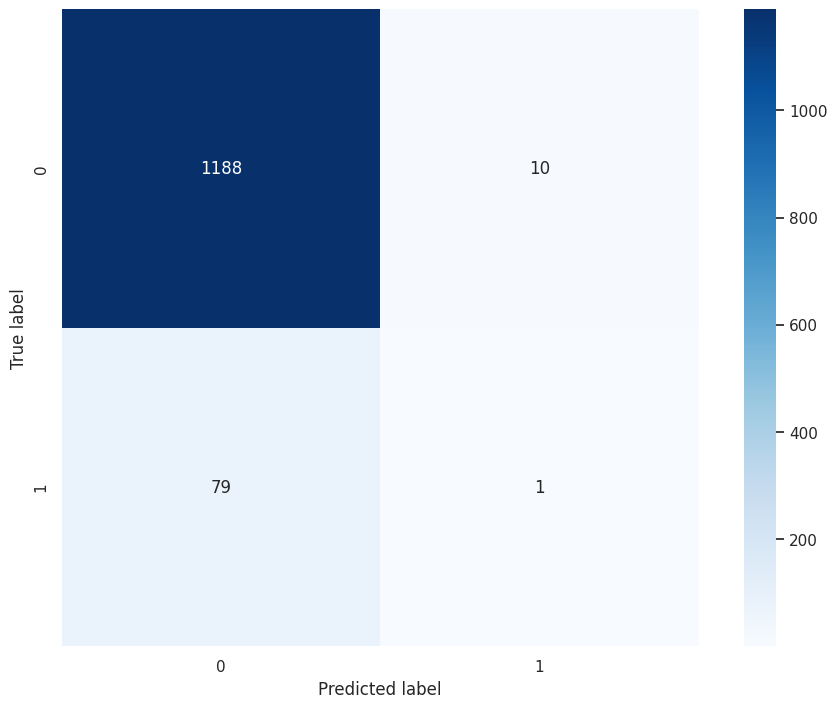

In [210]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_test_predict), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,knn2.predict(X_test)))

##8.Выводы.

Применив KNN получаем неплохую точность, отсутствие переобучения и недообучения, что довольно неплохо, несмотря на то что модель не очень хорошо справляется с предсказанием наличия инсульта(на это, скорее всего влияет несбалансированность классов).

##9.Попытка применить другие классификаторы.


###SVC

In [211]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.0435917515009136 0.06259780907668232


[[1198    0]
 [  80    0]]


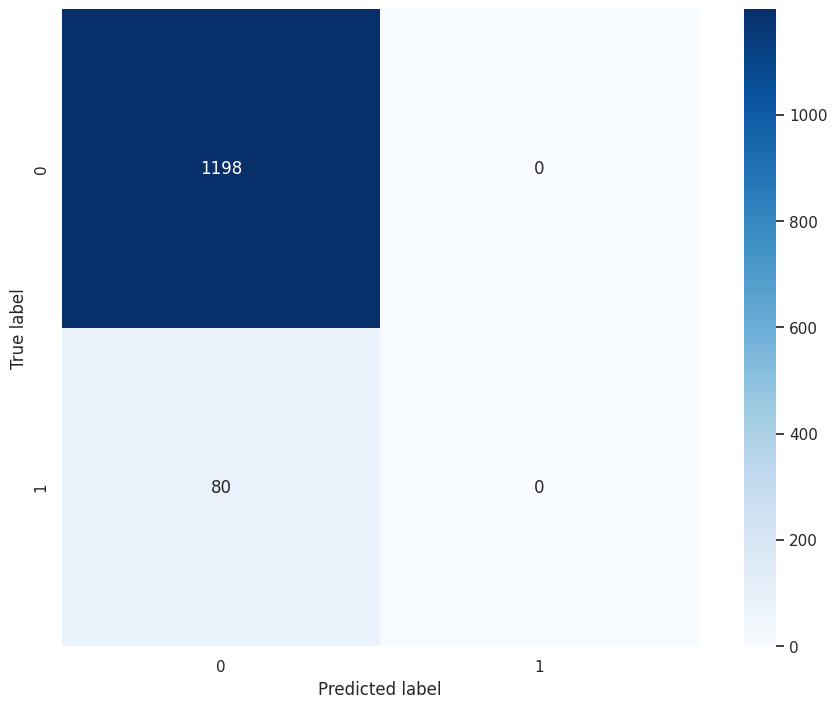

In [212]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,svc.predict(X_test)))

При использовании машины опорных векторов ошибка на тесте не особо уменьшилась, при построении confusion matrix видно, что лучше чем в KNN предсказывается отсутствие инсульта, но также не определяется его наличие

###XGBOOST

In [214]:
import xgboost
xgb = xgboost.XGBClassifier(enable_categorical = True)
xgb.fit(X_train, y_train)
err_train = np.mean(y_train != xgb.predict(X_train))
err_test  = np.mean(y_test  != xgb.predict(X_test))

print(err_train, err_test)

0.0005220569042025581 0.06651017214397496


[[1187   11]
 [  74    6]]


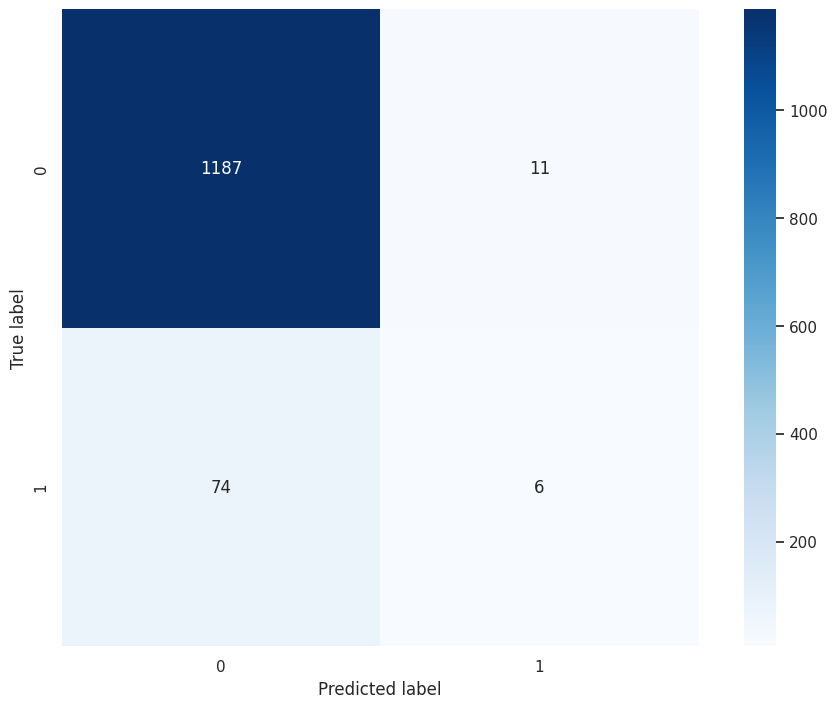

In [215]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, xgb.predict(X_test)))

XGBOOST как алгоритм лучше работающий с несбалансированнми классами уже может верно определить и наличие инсульта, пусть всё ещё не особо хорошо справляется с этим, ошибка на тесте немного больше, чем у предыдущих моделей, а ошибка на обучающей выборке крайне мала, что может свидетельствовать о переобучении, несмотря на которое модель всё ещё неплохо справляется и на тестовой выборке.

###Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

[[1196    2]
 [  80    0]]


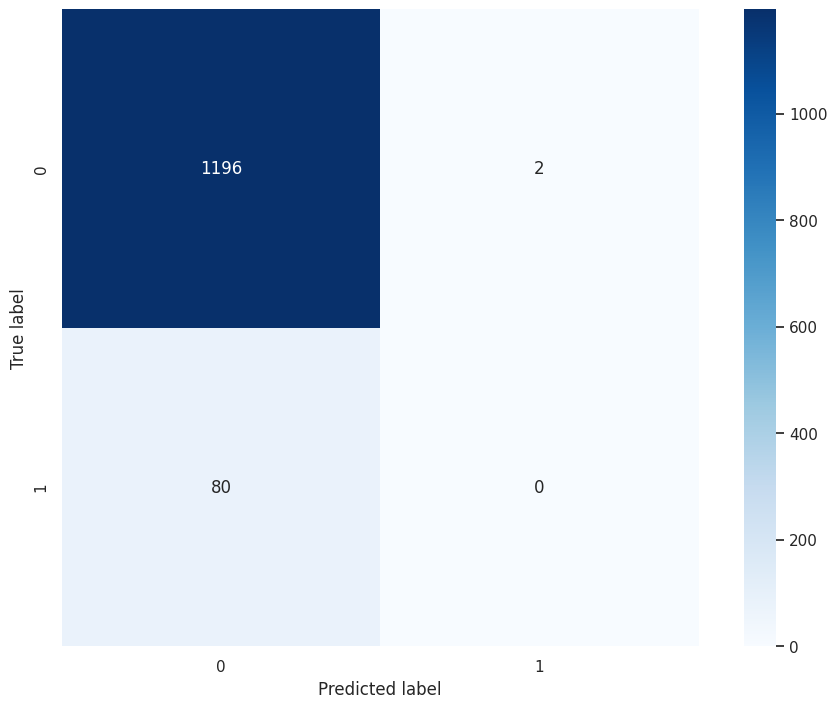

In [217]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, rfc.predict(X_test)))

In [218]:
err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != rfc.predict(X_test))

print(err_train, err_test)

0.0 0.06416275430359937


Случайный лес сумел один раз правильно предсказать наличие инсульта, в отличие от KNN и SVC, хотя всё ещё в этом плане уступает XGBOOST, хотя ошибка на тесте в данном случае ниже. Ошибка на тесте нулевая, что может, опять же, свидетельствовать о переобучении.

##10.Попытка борьбы с несбалансированностью классов.

In [219]:
from sklearn.metrics import classification_report

report = classification_report(y_test, knn2.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


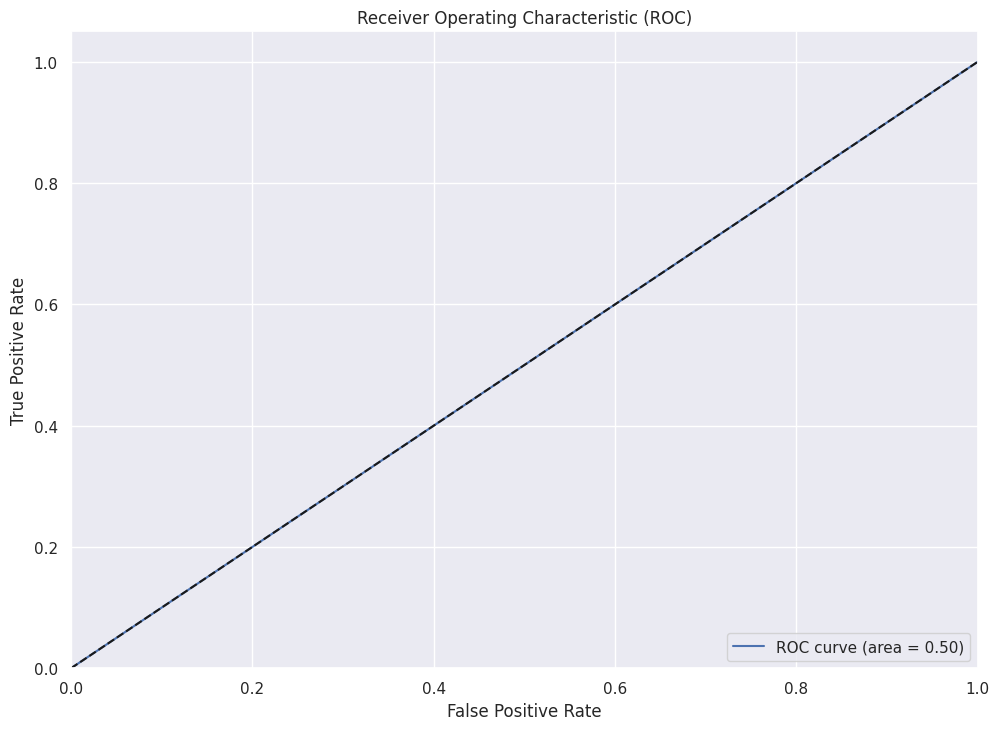

In [220]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, knn2.predict(X_test))  # вычисляем значения FPR и TPR для различных порогов

auc = roc_auc_score(y_test, knn2.predict(X_test))  # вычисляем AUC-ROC

# строим ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Для KNN видим, что F1-мера равна 0 для класса 1, соответствующего наличию инсульта, да и график ROC-кривой показывает, что всё довольно печально. Причиной этого может быть несбалансированность классов, с которой попробуем побороться. Для этого используем SMOTE, в котором генерируем синтетические примеры класса-меьшинства на основе близлежащих соседей.

In [221]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<Axes: title={'center': 'Распределение классов после SMOTE'}, xlabel='stroke'>

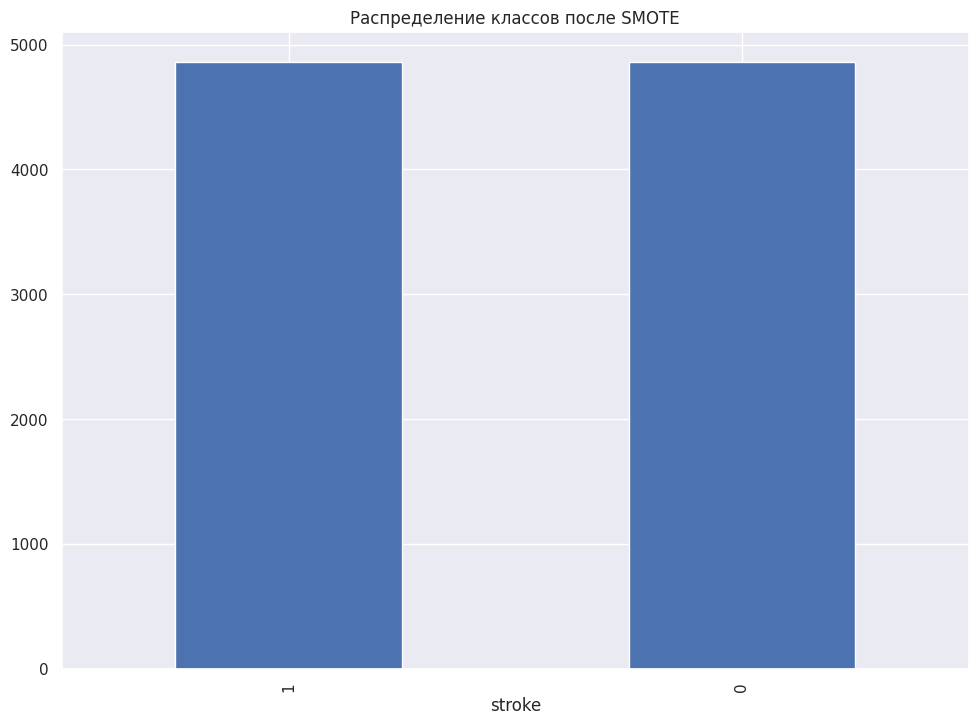

In [222]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Распределение классов после SMOTE', xlabel='stroke')

Разделим сбалансированные данные на обучающую и тестовуюе выборки:

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 777)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, N_test)

6804 2916


###KNN

In [224]:
knn2 = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train2 = np.mean(y_train != knn2.predict(X_train))
err_test2  = np.mean(y_test  != knn2.predict(X_test))

print(err_train2, err_test2)

0.11772486772486772 0.1416323731138546


[[1064  378]
 [  35 1439]]


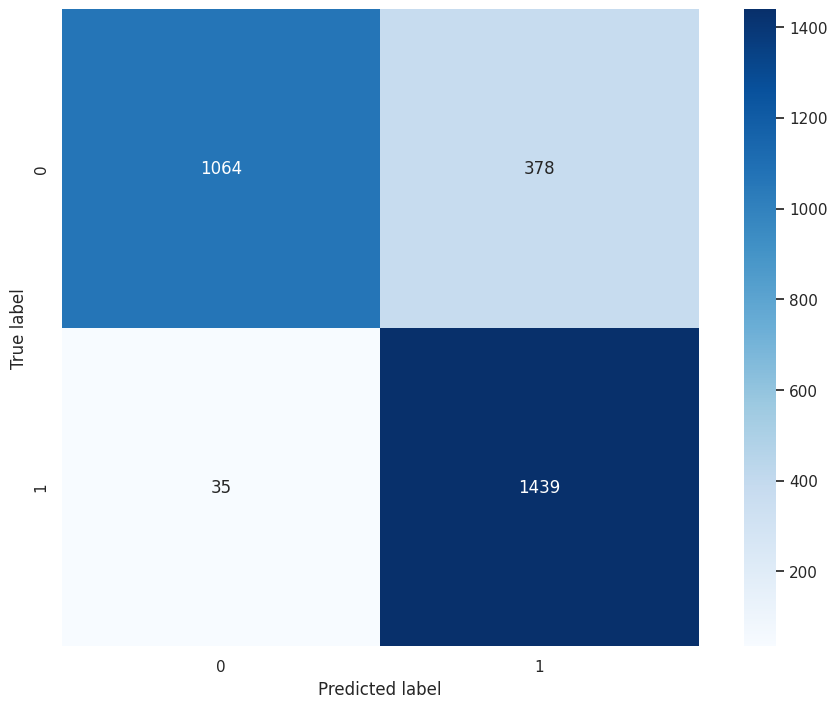

In [225]:
sns.heatmap(confusion_matrix(y_test, knn2.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,knn2.predict(X_test)))

Ошибка выросла, однако можно видеть, что модель теперь нормально предсказывает наличие инсульта.

In [226]:
from sklearn.metrics import classification_report

report = classification_report(y_test, knn2.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1442
           1       0.79      0.98      0.87      1474

    accuracy                           0.86      2916
   macro avg       0.88      0.86      0.86      2916
weighted avg       0.88      0.86      0.86      2916



F1-мера также теперь выглядит адекватно.

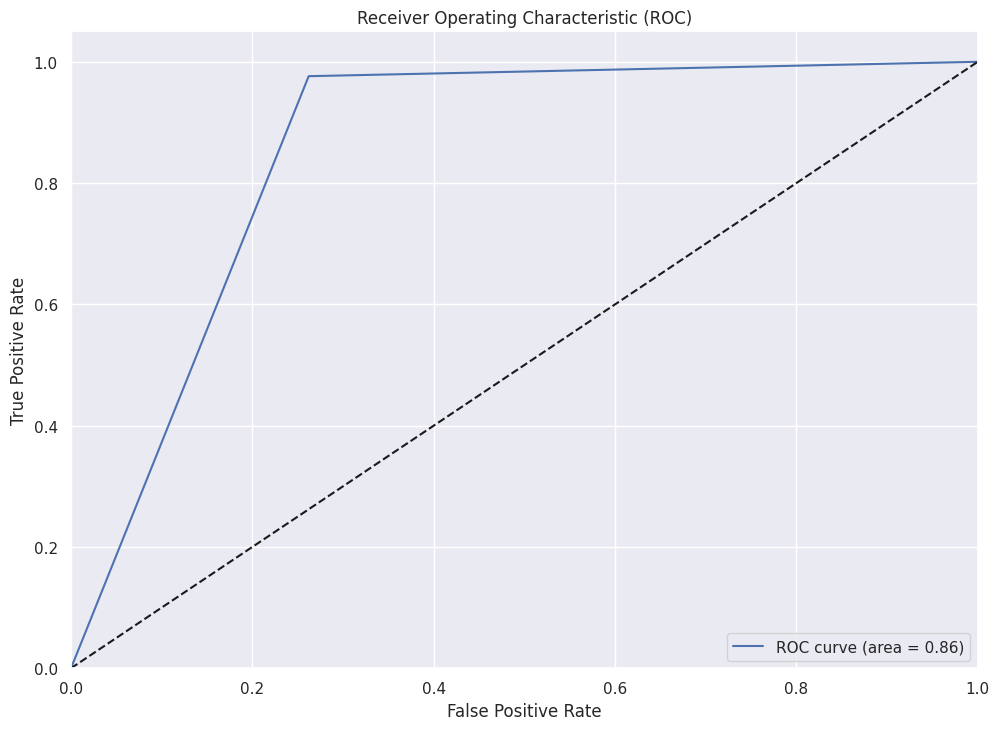

In [227]:
fpr, tpr, thresholds = roc_curve(y_test, knn2.predict(X_test))  # вычисляем значения FPR и TPR для различных порогов

auc = roc_auc_score(y_test, knn2.predict(X_test))  # вычисляем AUC-ROC

# строим ROC-кривую
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

 ROC-кривая тоже выглядит лучше.

###SVC

In [228]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.1493239271017049 0.16392318244170095


[[1100  342]
 [ 136 1338]]


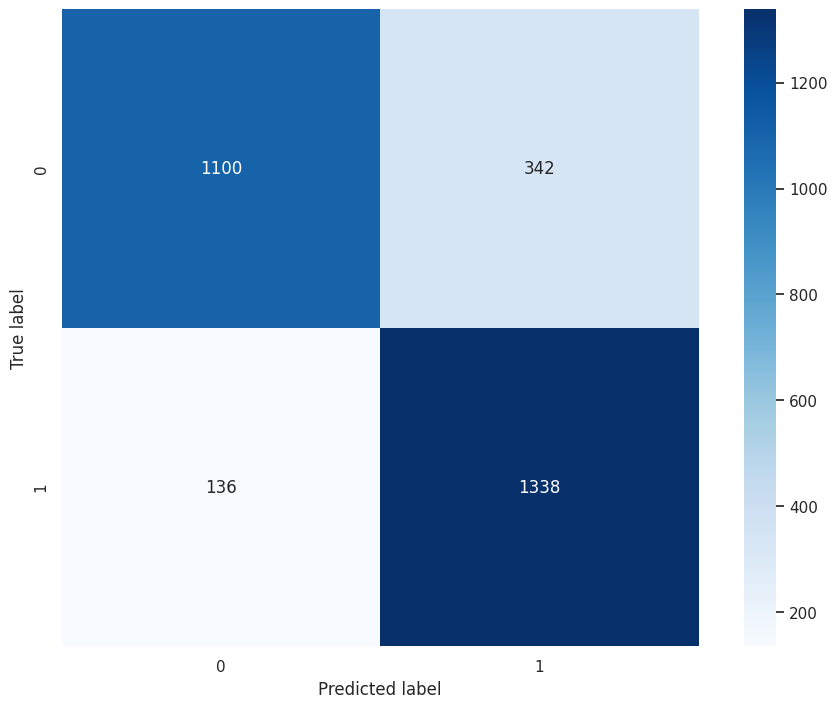

In [229]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,svc.predict(X_test)))

Ошибка также повысилась, и даже выше, чем у KNN, но аналогично теперь класс 1 стал нормально предсказываться.

###XGBOOST

In [234]:
xgb = xgboost.XGBClassifier(enable_categorical = True)
xgb.fit(X_train, y_train)
err_train = np.mean(y_train != xgb.predict(X_train))
err_test  = np.mean(y_test  != xgb.predict(X_test))

print(err_train, err_test)

0.00205761316872428 0.05212620027434842


[[1375   67]
 [  85 1389]]


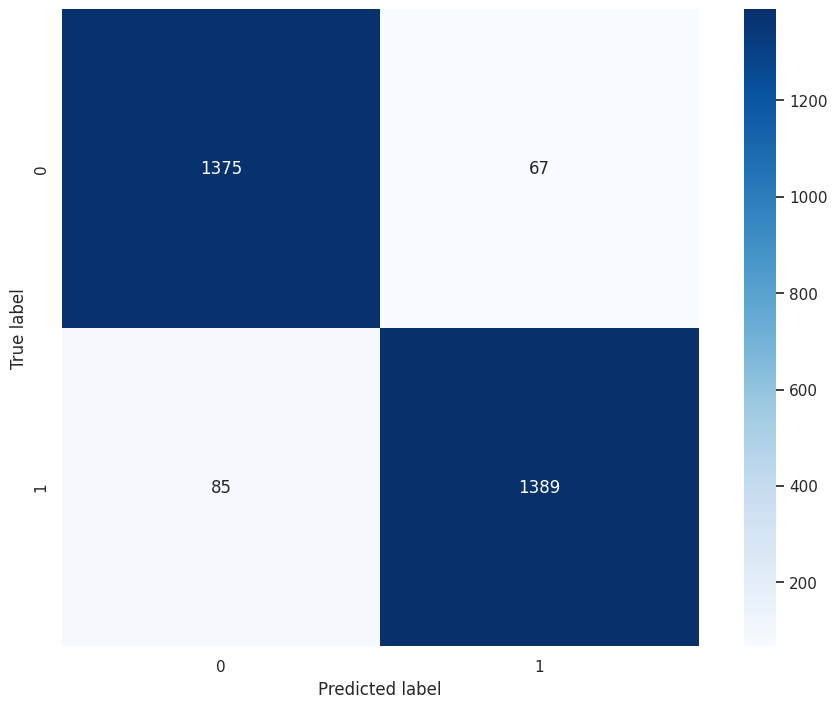

In [235]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, xgb.predict(X_test)))

XGBOOST в сравнении с предыдущими показывает гораздо меньшие значения ошибки, хотя ошибка на обучающей выборке все еще меньше, чем на тестовой, что наталкивает на мысли о наличии переобучения.

###Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != rfc.predict(X_test))

print(err_train, err_test)

0.0 0.046296296296296294


[[1360   82]
 [  53 1421]]


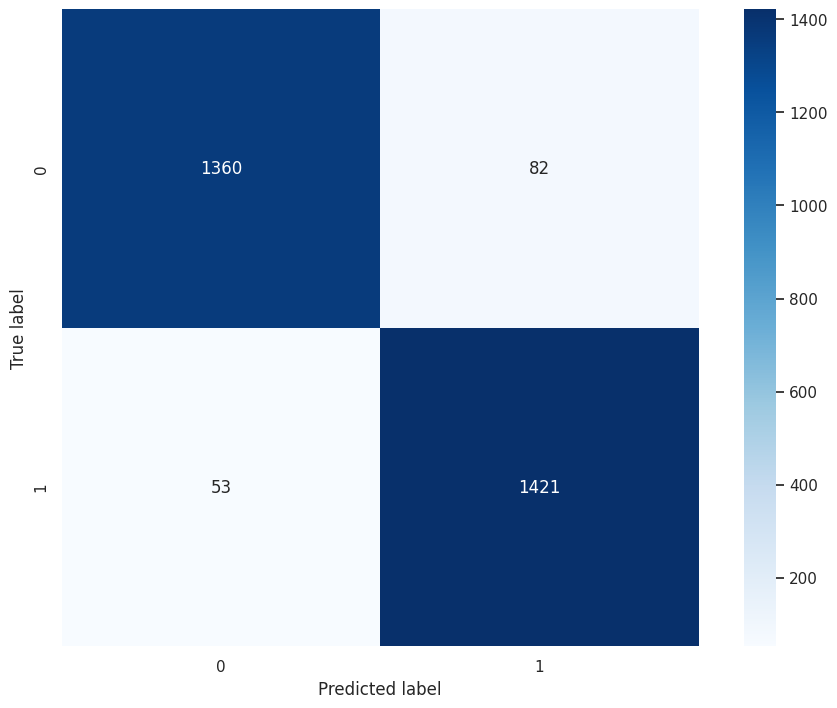

In [233]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, rfc.predict(X_test)))

Ошибка на обучающей выборке также нулевая(возможно переобучение), ошибка на тестовой меньше, чем у XGBOOST, KNN и SVC, тем не менее результат неплохой.

##11.Общий вывод.

Несбалансированность классов сильно влияет на качество модели, при преобладании одного класса KNN напрмер вообще не предсказывал случаи появления класса-меньшинства, поэтмоу несмотря на то, что в реальной жизни абсолютно естественно когда количество людей, перенесших инсульт сильно меньше, чем количество тех, у кого его не было, классы надо все же балансировать, чтобы модель могла адекватно работать с классом, редко появляющимся в исходных данных. Многие модели начинают работать плохо из-за несбалансированности классов, как например Random Forest, и даже XGBOOST, который лучше всех справляется с подобными случаями, помогает не сильно и лучше работает при наличии баланса.